In [1]:
import plotly
import pandas as pd
plotly.tools.set_credentials_file(username='cclipp', api_key='PXEF8jIWI8E52Cst97E4')

In [2]:
df = pd.read_csv(r'D:\uci_data\donorschoose-application-screening\train\train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182080 entries, 0 to 182079
Data columns (total 16 columns):
id                                              182080 non-null object
teacher_id                                      182080 non-null object
teacher_prefix                                  182076 non-null object
school_state                                    182080 non-null object
project_submitted_datetime                      182080 non-null object
project_grade_category                          182080 non-null object
project_subject_categories                      182080 non-null object
project_subject_subcategories                   182080 non-null object
project_title                                   182080 non-null object
project_essay_1                                 182080 non-null object
project_essay_2                                 182080 non-null object
project_essay_3                                 6374 non-null object
project_essay_4                        

In [4]:
subdf = df[['school_state', 'project_grade_category', 'project_is_approved','teacher_number_of_previously_posted_projects', 'project_title']]
subdf.columns = ['state', 'category', 'approve', 'projects', 'project_title']


In [5]:
subdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182080 entries, 0 to 182079
Data columns (total 5 columns):
state            182080 non-null object
category         182080 non-null object
approve          182080 non-null int64
projects         182080 non-null int64
project_title    182080 non-null object
dtypes: int64(2), object(3)
memory usage: 6.9+ MB


In [6]:
subdf.describe()

,approve,projects
count,182080.000000,182080.000000
mean,0.847682,11.237055
std,0.359330,28.016086
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,2.000000
75%,1.000000,9.000000
max,1.000000,451.000000


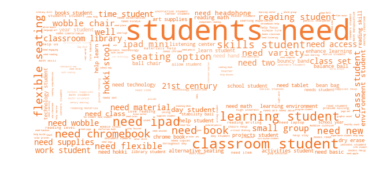

In [31]:
import re
from nltk.corpus import stopwords
import numpy as np
from PIL import Image
from os import path
import matplotlib.pyplot as plt

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))
def text_prepare(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower()# lowercase text  
    text = REPLACE_BY_SPACE_RE.sub(' ',text)# replace REPLACE_BY_SPACE_RE symbols by space in text    
    text = BAD_SYMBOLS_RE.sub('',text)# delete symbols which are in BAD_SYMBOLS_RE from text    
    temp = [s.strip() for s in text.split() if s not in STOPWORDS]# delete stopwords from text
    new_text = ''
    for i in temp:
        new_text +=i+' '
    text = new_text
    return text.strip()

temp_data = df.dropna(subset=['project_resource_summary'])
# converting into lowercase
temp_data['project_resource_summary'] = temp_data['project_resource_summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))
temp_data['project_resource_summary'] = temp_data['project_resource_summary'].map(text_prepare)



from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

donorsChoose = np.array(Image.open("logo.png"))
stopwords = set(STOPWORDS)
stopwords.add("need")


image_colors = ImageColorGenerator(donorsChoose)

wc = WordCloud(max_font_size=50, width=1200, height=900,
                      background_color="white", mask=donorsChoose).generate(' '.join(temp_data['project_resource_summary'].values))
# show
# recolor wordcloud and show
# we could also give color_func=image_colors directly in the constructor
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.savefig('resource_wordcloud.jpg', bbox_inches='tight')
plt.figure()
#plt.show()

In [10]:
ImageColorGenerator??

Init signature: ImageColorGenerator(image, default_color=None)
Source:        
class ImageColorGenerator(object):
    """Color generator based on a color image.

    Generates colors based on an RGB image. A word will be colored using
    the mean color of the enclosing rectangle in the color image.

    After construction, the object acts as a callable that can be passed as
    color_func to the word cloud constructor or to the recolor method.

    Parameters
    ----------
    image : nd-array, shape (height, width, 3)
        Image to use to generate word colors. Alpha channels are ignored.
        This should be the same size as the canvas. for the wordcloud.
    default_color : tuple or None, default=None
        Fallback colour to use if the canvas is larger than the image,
        in the format (r, g, b). If None, raise ValueError instead.
    """
    # returns the average color of the image in that region
    def __init__(self, image, default_color=None):
        if image.ndim 